In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv('D:\\ishita\\cars_data_clean.csv') # Loading dataset
df.head()

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN


In [3]:
subset=df[df["owner_type"]=="first"] # Extracting first ownership data

In [4]:
# filtering required columns & storing it in a dataset
df1=pd.DataFrame(subset,columns=["km","listed_price"])
df1

,km,listed_price
0,69162.0,370000.0
1,45864.0,365000.0
4,18900.0,1175000.0
5,60000.0,250000.0
6,67000.0,145000.0
...,...,...
37807,14857.0,2126000.0
37809,82843.0,245000.0
37810,58000.0,735000.0
37811,62000.0,225000.0


In [5]:
df1.isnull().sum() # checking for null values

km              0
listed_price    0
dtype: int64

In [6]:
# checking normality for km and listed_price
# criteria 1
s1=df1["km"].std() # sd of km
s2=df1["listed_price"].std() # sd of listed_price
m1=df1["km"].mean() # mean of km
m2=df1["listed_price"].mean() # mean of listed_price
ul1=m1+s1 # upper limit of km
ll1=m1-s1 # lower limit of km
ul2=m2+s2 # upper limit of listed_price
ll2=m2-s2 # lower limit oflisted_price
n=len(df1) # length of variables
c1=df1[(df1["km"]>ll1) & (df1["km"]<ul1)]["km"].count() # count of km
c2=df1[(df1["listed_price"]>ll2) & (df1["listed_price"]<ul2)]["listed_price"].count() # count of listed_price
p1=round((c1/n)*100,2) # percentage of km
p2=round((c2/n)*100,2) # percentage of listed_price
p1,p2

(92.03, 98.42)

In [7]:
# criteria 2
ul1=m1+2*s1
ll1=m1-2*s1
ul2=m2+2*s2
ll2=m2-2*s2
c1=df1[(df1["km"]>ll1) & (df1["km"]<ul1)]["km"].count()
c2=df1[(df1["listed_price"]>ll2) & (df1["listed_price"]<ul2)]["listed_price"].count()
p1=round((c1/n)*100,2)
p2=round((c2/n)*100,2)
p1,p2

(98.55, 99.7)

In [8]:
# criteria 3
ul1=m1+3*s1
ll1=m1-3*s1
ul2=m2+3*s2
ll2=m2-3*s2
c1=df1[(df1["km"]>ll1) & (df1["km"]<ul1)]["km"].count()
c2=df1[(df1["listed_price"]>ll2) & (df1["listed_price"]<ul2)]["listed_price"].count()
p1=round((c1/n)*100,2)
p2=round((c2/n)*100,2)
p1,p2

(99.62, 99.88)

In [9]:
# checking outliers
Q1=df1.quantile(.25)
Q3=df1.quantile(.75)
Iqr=Q3-Q1
Lower_bound = Q1-1.5*Iqr
Upper_bound = Q3+1.5*Iqr
Outliers = df1[(df1<Lower_bound)|(df1>Upper_bound)]
Num_outliers = len(Outliers)
Num_outliers

26571

In [10]:
# Storing inner range in a dataframe
df2=df1[((df1>(Lower_bound)) & (df1<(Upper_bound)))]
df2

,km,listed_price
0,69162.0,370000.0
1,45864.0,365000.0
4,18900.0,1175000.0
5,60000.0,250000.0
6,67000.0,145000.0
...,...,...
37807,14857.0,NaN
37809,82843.0,245000.0
37810,58000.0,735000.0
37811,62000.0,225000.0


In [11]:
df2.isnull().sum() # null values check

km               717
listed_price    2111
dtype: int64

In [12]:
df2.dropna(inplace=True) # removing null values
df2

,km,listed_price
0,69162.0,370000.0
1,45864.0,365000.0
4,18900.0,1175000.0
5,60000.0,250000.0
6,67000.0,145000.0
...,...,...
37806,66000.0,760000.0
37809,82843.0,245000.0
37810,58000.0,735000.0
37811,62000.0,225000.0


In [13]:
# train_dataset
df3=df2.iloc[:1000,] # extracting first 1000 rows
df3

,km,listed_price
0,69162.0,370000.0
1,45864.0,365000.0
4,18900.0,1175000.0
5,60000.0,250000.0
6,67000.0,145000.0
...,...,...
1415,50000.0,1800000.0
1416,44600.0,455000.0
1417,131323.0,610000.0
1418,50000.0,800000.0


In [14]:
Y=df3['listed_price']
X=df3['km']
X=sm.add_constant(X) # Adds a constant term to the predictor
model=sm.OLS(Y,X) # Defining the linear regression model
model_result=model.fit() # The .fit() method performs the regression analysis and calculates the model parameters (coefficients)
model_result.summary() # Output the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           listed_price   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     320.8
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.99e-62
Time:                        00:43:13   Log-Likelihood:                -14017.
No. Observations:                1000   AIC:                         2.804e+04
Df Residuals:                     998   BIC:                         2.805e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.229e+05   1.77e+04     46.380      0.000    7.88e+05    8.58e+05
km            -5.0448      0.282    -17.912      0.000      -5.597      -4.492
==============================================================================
Omnibus:                      349.309   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.306
Skew:                           1.728   Prob(JB):                    5.35e-244
Kurtosis:                       6.865   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df3["predicted_lp"]=model_result.predict(X)

C:\Users\mahes\AppData\Local\Temp\ipykernel_18024\2044530764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["predicted_lp"]=model_result.predict(X)


In [16]:
# calculating MAPE for model 
df["error"]=Y-df3["predicted_lp"]
df["rel_error"]=df["error"]/Y
df["abs"]=df["rel_error"].abs()
MAPE=df["abs"].mean()*100
MAPE

50.93645788427814

In [17]:
df3

,km,listed_price,predicted_lp
0,69162.0,370000.0,473976.441580
1,45864.0,365000.0,591509.275794
4,18900.0,1175000.0,727536.202643
5,60000.0,250000.0,520196.538887
6,67000.0,145000.0,484883.214160
...,...,...,...
1415,50000.0,1800000.0,570644.145641
1416,44600.0,455000.0,597885.853287
1417,131323.0,610000.0,160389.073241
1418,50000.0,800000.0,570644.145641


<function matplotlib.pyplot.show(close=None, block=None)>

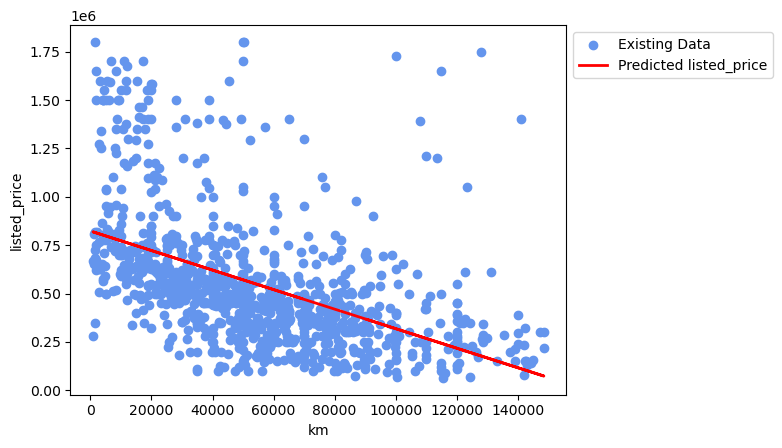

In [18]:
# Visualizing the model
plt.scatter(df3["km"],df3["listed_price"],color="cornflowerblue", label="Existing Data")
plt.plot(df3["km"],df3["predicted_lp"],color="red",linestyle="-",linewidth=2, label="Predicted listed_price")
plt.xlabel('km')
plt.ylabel('listed_price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Change 'upper left' to your desired position  
plt.show

In [19]:
# test_dataset
df4=df2.iloc[1000:1500,] # extracting rest of the rows
df4

,km,listed_price
1423,15013.0,1200000.0
1424,52061.0,1560000.0
1425,50000.0,1050000.0
1428,145000.0,474999.0
1429,68906.0,900000.0
...,...,...
2399,80000.0,120000.0
2400,25000.0,490000.0
2402,110000.0,180000.0
2404,20000.0,490000.0


<function matplotlib.pyplot.show(close=None, block=None)>

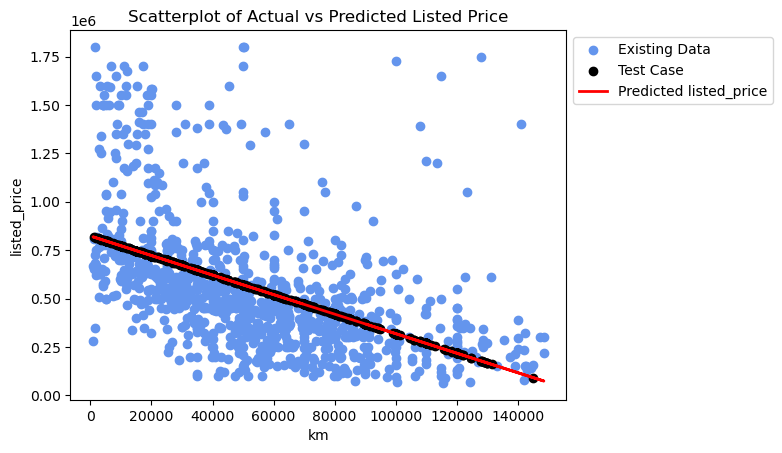

In [20]:
# Visualizing the trained and tested data
plt.scatter(df3["km"],df3["listed_price"],color="cornflowerblue", label="Existing Data")
plt.scatter(df4["km"],model_result.predict(sm.add_constant(df4["km"])),color="black", label="Test Case")
plt.plot(df3["km"],df3["predicted_lp"],color="red",linestyle="-",linewidth=2, label="Predicted listed_price")
plt.xlabel('km')
plt.ylabel('listed_price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Change 'upper left' to your desired position
plt.title("Scatterplot of Actual vs Predicted Listed Price")
plt.show